OpenCV : 이미지 처리 전용 라이브러리

### 이미지 불러오기

In [1]:
import cv2

# imread() : 이미지를 읽는 기능    ##한 장 읽을때 사용
# cv2.IMREAD_COLOR : 칼라 이미지를 읽는 설정
lenna = cv2.imread("./Data/lenna.png", cv2.IMREAD_COLOR)

# 이미지를 출력하는 기능 (타이틀, 이미지)
cv2.imshow("lenna", lenna)

# 아무키나 누르는 것을 대기 (0일시 무한대기)
cv2.waitKey(0)
# 열린 창을 모두 닫는다
cv2.destroyAllWindows()


### matplotlib 라이브러리와 연동

([], [])

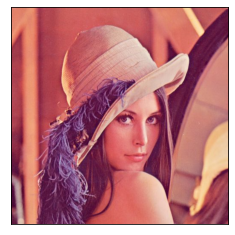

In [2]:
import matplotlib.pyplot as plt

lenna = cv2.imread("./Data/lenna.png", cv2.IMREAD_COLOR)
# 색상 공간을 변환 (BGR로 되어있는 이미지 -> RGB)
## OpenCV는 BGR 사용,
## Matplotlib은 RGB로 이미지 보여줌
### b, g, r = cv2.split(lenna)      ## 이미지파일 분리
### lenna2 =cv2.merge([r,g,b])      ## 이미지 b,r 변경
lenna2 = cv2.cvtColor(lenna, cv2.COLOR_BGR2RGB)

plt.imshow(lenna2)
# 눈금 생략하기
plt.xticks([])
plt.yticks([])

#RGB -> BGR 

### 그레이, 흑백이미지로 불러오기
- 칼라 이미지 : RGB 등의 색상으로 이루어진 이미지
- 그레이 이미지 : 0-255 '사이의' 픽셀로 이루어진 이미지 (흡사 흑백)
- 흑백 이미지 (=이진 이미지) : 0과 255 또는 0과 1의 픽셀로 이루어진 이미지

([], [])

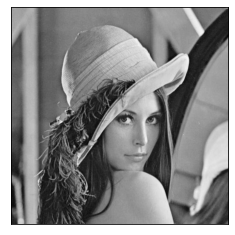

In [3]:
lenna_gray = cv2.imread("./data/lenna.png", cv2.IMREAD_GRAYSCALE)
#lenna3 = cv2.cvtColor(lenna_gray, cv2.COLOR_GRAY2BGR)
###안됨lenna3 = cv2.cvtColor(lenna_gray, cv2.COLOR_BGR2GRAY)

#plt.imshow(lenna3)
plt.imshow(lenna_gray, cmap="gray")

plt.xticks([])
plt.yticks([])

thresholding type에 따른 이미지 변화
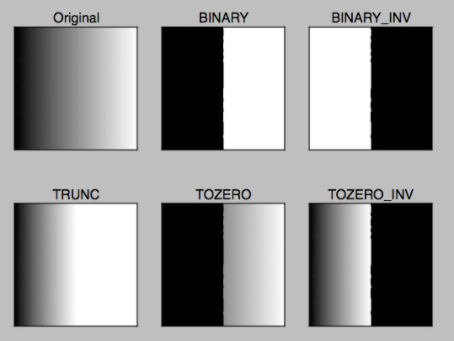

([], [])

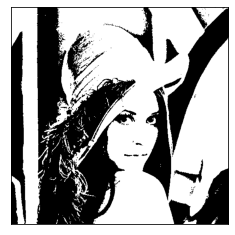

In [4]:
# 이진이미지

# 이미지 픽셀값을 127보다 큰 값은 255로, 작은 값은 0으로 변환
## cv2.threshold(grayscale이미지, 임계값, 임계값을 넘었을 때 적용할 value, thresholding type)
_, thlmg = cv2.threshold(lenna_gray, 127, 255, cv2.THRESH_BINARY)
#변환리턴값(필요없어서 안받으니 _)

plt.imshow(thlmg, cmap="gray")
plt.xticks([])
plt.yticks([])

### 동영상 파일 읽기

In [5]:
try:
    #cap = cv2.VideoCapture("./Data/video.mp4")
    # 0번 카메라로부터 영상을 캡처
    cap = cv2.VideoCapture(0)   ##이 한줄로 간단하게 카메라와 연동시켜 쓸 수 있다!
                                ##안의 숫자는 어떤 카메라를 사용할 것인가(장치인덱스) 
                                ##1개부착시 0, 두번째웹캠부터는 1로 지정
    print("영상 캡쳐 성공")
except:  #예외처리
    print("영상 캡쳐 실패")
    
# 영상의 크기 설정
# 3 : 가로크기, 4: 세로크기
cap.set(3, 480)
cap.set(4, 320)

# 영상을 읽는다
while True:                   ## 특정 키를 누를때까지 무한 반복하기 위함
    # 한 장의 이미지를 읽는다 (비디오의 한 프레임씩 읽음)
    ret, frame = cap.read()    ## 프레임 제대로 읽었다면 ret값이 True, 실패시 False
                               ## frame에 읽은 프레임이 나옴
    # 이미지 읽기 실패라면 반복문 종료
    if not ret:
        print("비디오 읽기 실패")
        break
        
    # 24비트 컬러를 32비트 컬러로 변환    
    img = cv2.cvtColor(frame, cv2.COLOR_RGB2RGBA)                 #비디오는 RGB로 되어있고, 컴퓨터는 RGBA를 쓰기 때문에
    #img = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)                #그레이
    #_, img = cv2.threshold(img, 100, 255, cv2.THRESH_BINARY)     #흑백
    # 읽은 이미지를 출력
    cv2.imshow("", img)
    
                             ### 이미지는 30장(~60)/sec
                             ### 비디오는 1000
    # 1초에 30장의 이미지를 출력하기 위해서 딜레이 부여
    k = cv2.waitKey(33)
    
    if k == 49: # 누른 키가 숫자 1이라면(ascii code)
        cap.release()      #캡쳐 해제
        cv2.destroyAllWindows()
        break

영상 캡쳐 성공
비디오 읽기 실패


### 녹화하기

In [6]:
try:
    cap = cv2.VideoCapture("./Data/video1.mp4")
    #cap = cv2.VideoCapture(0)
    print("영상 캡쳐 성공")
except:
    print("영상 캡쳐 실패")
    
# 녹화설정
# 프레임수 : 1초당 실행될 이미지 수
fps = 30

# 플레이되는 영상크기
width = int(cap.get(3))
height = int(cap.get(4))

# 코덱 설정 (mpeg로 설정)
fcc = cv2.VideoWriter_fourcc(*'DIVX')  ## 혹은 ('D','I','V','X') 와 같이 입력 가능

# 녹화 파일 설정         (파일명,    코덱정보, 프레임수(초당 저장될), 크기(가로,세로))
out = cv2.VideoWriter("./Data/cap01.avi", fcc, fps, (width, height))
print("녹화 시작합니다")

while True:
    ret, frame = cap.read()        #return값 ret과 frame 반환
    
    if not ret:
        print("영상 읽기 실패")
        break
        
    img = cv2.cvtColor(frame, cv2.COLOR_RGB2RGBA)
    cv2.imshow("", img)
    
    # 녹화 실행
    out.write(frame)
    
    k = cv2.waitKey(33)

    
    if k == 49:
        print("녹화 종료")
        cap.release()
        out.release()
        cv2.destroyAllWindows()
        break

영상 캡쳐 성공
녹화 시작합니다
녹화 종료


### 영상에서 원하는 프레임을 저장 (2를 누르면)

In [7]:
try:
    cap = cv2.VideoCapture("./Data/video1.mp4")
except:
    print("비디오 캡쳐 실패")
    
count = 1
while True:
    ret, frame = cap.read()
    
    if not ret:
        print("비디오 읽기 실패")
        break
        
    img = cv2.cvtColor(frame, cv2.COLOR_RGB2RGBA)
    cv2.imshow("", img)
    
    k = cv2.waitKey(33)
    
    if k == 49:
        cap.release()
        cv2.destroyAllWindows()
        break
        
    if k == 50:    # 숫자 2를 누른 경우
        count += 1
        # 이미지를 저장 
        #          (파일명,              이미지명,   압축방법, 압축률 (0-9 : 클수록 더 압축)) (default:3)
        cv2.imwrite("./Data/image{}.png".format(count), frame, params=[cv2.IMWRITE_PNG_COMPRESSION, 0])

### 이미지 처리 방법

- (1) 픽셀 기반 처리 : 픽셀값을 직접 처리
- (2) 영업 기반 처리 : 픽셀을 그룹화해서 처리
- (3) 주파수 기반 처리 : 픽셀값을 주파수로 변환하여 처리

#### 픽셀값 읽기

In [8]:
lenna = cv2.imread("./Data/lenna.png")

px = lenna[200, 100]
print(px)
# B   G   R (4개나오면 마지막 A_투명도)

[ 75  61 173]


In [9]:
## 이 위치에(y축,x축)   빨간색 점을 찍어보자
lenna[200, 100] = [0, 0, 225]
lenna[201, 100] = [0, 0, 225]
lenna[200, 101] = [0, 0, 225]
lenna[201, 101] = [0, 0, 225]

## img.itemset((200,       100,          1), 255)
##            ((픽셀y위치, 픽셀x위치, 채널), 색상레벨)
##                                  - 채널 (0 : Blue, 1 : Green, 2 : Red)


cv2.imshow("", lenna)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### 이미지 속성

In [10]:
# 이미지의 크기와 컬러 채널 수 (3:BGR, 1:그레이)
lenna.shape

(512, 512, 3)

In [11]:
# 전체 픽셀수
lenna.size

786432

In [12]:
# 픽셀 값의 데이터 타입
# unit8 : unsigned(양수인) int(정수형) 8(8비트 -> 0~255)
lenna.dtype

dtype('uint8')

#### ROI (Region of Image) : 이미지에서 원하는 영역
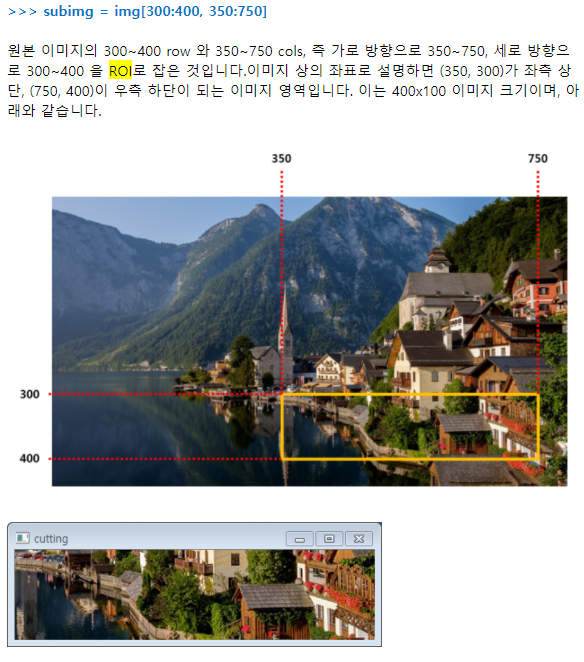

In [13]:
##     row 200~400영역, columns 200~380영역  >>>> 둘이 겹치는 부분 
subimg = lenna[200:400, 200:380]

cv2.imshow("", subimg)
cv2.waitKey(0)
cv2.destroyAllWindows()

# 16th

## 그리기 함수

- 선 그리기
    - cv2.line(이미지 시작점 좌표, 끝점 좌표, 색상, 두께)
    
- 원 그리기
    - cv2.circle(이미지, 중심 좌표, 반지름, 색상, 두께)
    
- 사각형 그리기
    - cv2.rectangle(이미지, 좌상단 좌표, 우하단 좌표, 색상, 두께)
    
- 타원 그리기
    - cv2.ellipse(이미지, 중심좌표, 장축길이/단축길이, 기울기, 시작각도, 끝각도, 색상,두께)
    
- 텍스트 출력
    - cv2.putText(이미지, 출력내용, 시작좌표, 폰트종류, 폰트크기 색상, 굵기)

In [14]:
import cv2

lenna = cv2.imread("./Data/lenna.png", cv2.IMREAD_COLOR)

#lenna = cv2.line(lenna, (100,100), (100,200), (0,0,255),3)
#lenna = cv2.circle(lenna, (100,100), 40, (0,0,255),3)
#lenna = cv2.rectangle(lenna, (200,100), (400,400), (0,0,255),3)
#lenna = cv2.ellipse(lenna, (256, 256), (100, 50), 0, 0, 360, (0,0,255),3)
lenna = cv2.putText(lenna, 'LENNA', (90,90),cv2.FONT_HERSHEY_COMPLEX, 1, (255,0,0),4)

cv2.imshow("", lenna)

cv2.waitKey(0)
cv2.destroyAllWindows()

### RGB -> HSV (색상, 채도, 명도)
    - Hue(색상), Saturation(채도), Value(진하기)
        - saturation은 원의 중심에서 0%에서 100%까지를 의미
        - V는 바닥에서 천장까지 0~100%를 의미
        - openCV에서는 Hue의 범위를 [0, 179]까지 saturation, Value의 범위를 [0, 255]로 정의하고 있음
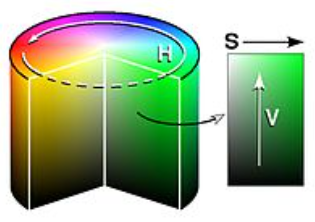

#### 색상 추적하기

In [15]:
import numpy as np

balloon = cv2.imread("./Data/balloon.jpg")

hsv = cv2.cvtColor(balloon, cv2.COLOR_BGR2HSV)

# 추출할 색상의 범위
##빨강풍선
lower = np.array([-10, 100, 100])      #np.array를 통해 hsv를 표현해줄 범위 만듦
higher = np.array([10, 255, 255])

##파랑
lower = np.array([100, 100, 100])
higher = np.array([130, 255, 255])

##노랑
#lower = np.array([10, 100, 100])
#higher = np.array([30, 255, 255])

##초록
#lower = np.array([45, 100, 100])
#higher = np.array([75, 255, 255])


# 범위마스크 설정
mask = cv2.inRange(hsv, lower, higher)  ## 해당 범위에 속하면 값을 그대로 두고, 나머지 부분은 0으로 채워서 결과값을 반환
img2 = cv2.bitwise_and(balloon, balloon, mask=mask)  ## mask 값이 0이 아닌 부분만 AND 연산 
                                                    ##이미지도있고 마스크도 있음

cv2.imshow("", img2)

cv2.waitKey(0)
cv2.destroyAllWindows()

### 침식 (erosion), 팽창(dilation)

- 침식 : 이미지 경계부분을 배경 픽셀로 변경하는 것
- 팽창 : 이미지 배경부분을 전경 픽셀로 변경하는 것

In [16]:
import cv2
import numpy as np

number = cv2.imread("./Data/number.png", cv2.IMREAD_GRAYSCALE)
cv2.imshow("original", number)

# (3, 3) 크기의 배열에 1로 초기화
kernel = np.ones((2, 2), np.uint8)

erosion = cv2.erode(number, kernel, iterations=2)  ##5번 넣으니 너무 침벅해서 사라져버림  #연해지고
dilation = cv2.dilate(number,kernel, iterations=2) ##배경으로 글씨가 팽창해서 진해짐

cv2.imshow("erosion", erosion)
cv2.imshow("dilation", dilation)

cv2.waitKey(0)
cv2.destroyAllWindows()

### Opening과 Closing

- Opening : 침식 후에 팽창을 하는 것
- Closing : 팽창 후에 침식을 하는 것

In [17]:
import cv2

# 검정색 배경에 흰색 잡음이 있는 경우 -> Opening 써야함
numA = cv2.imread("./Data/noise_A.png", cv2.IMREAD_GRAYSCALE)
cv2.imshow("original",numA)

kernel = np.ones((4,4), np.uint8)

# Opening
opening = cv2.morphologyEx(numA, cv2.MORPH_OPEN, kernel)  ## kernel만큼의 크기로 오픈 (검정흰색으로만 이루어진(이진)이미지 = morphology)

cv2.imshow("opening", opening)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [18]:
import cv2

# 흰색 글씨에 검정색 잡음이 있는 경우 -> Closing 써야함
numB = cv2.imread("./Data/noise_B.png", cv2.IMREAD_GRAYSCALE)
cv2.imshow("original",numB)

kernel = np.ones((4,4), np.uint8)

# closing
closing = cv2.morphologyEx(numB, cv2.MORPH_CLOSE, kernel)  ## kernel만큼의 크기로 오픈 (검정흰색으로만 이루어진(이진)이미지 = morphology)

cv2.imshow("closing", closing)

cv2.waitKey(0)
cv2.destroyAllWindows()

### 이미지 특성 추출 : Edge
    - cv2.Canny(원본이미지, 임계값1, 임계값2, 커널크기, L2그라디언트)
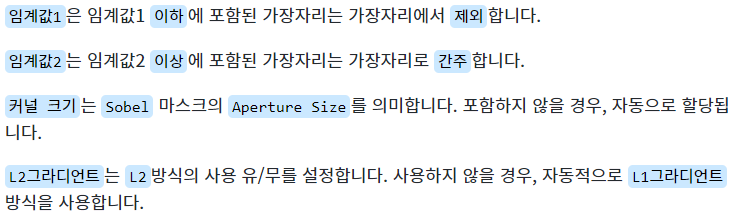

In [19]:
# Canny 엣지 검출기 .. 엣지는 외곽선이라고 한다면
import cv2

ball = cv2.imread("./Data/balloon.jpg", cv2.IMREAD_GRAYSCALE)

# 이미지, 최솟값, 최댓값
edge = cv2.Canny(ball, 200, 400)

cv2.imshow("canny", edge)

cv2.waitKey(0)
cv2.destroyAllWindows()

### 윤곽선 (Contour)
- 윤곽선은 닫힌 외곽선 (=폐곡선)

In [20]:
import cv2

ball = cv2.imread("./Data/balloon.jpg", cv2.IMREAD_GRAYSCALE)

# 127보다 큰 값은 255로 변경
_, th = cv2.threshold(ball, 230, 255, 0)

cv2.imshow("th", th)

# 윤곽선 추출
# cv2.RETR_TREE : 모든 외곽선(=윤곽선)을 추출하고 상관관계까지 추출
# CHAIN_APPROX_SIMPLE : 윤곽선의 끝점 정보만 가져오는 기능
_, contours, _ = cv2.findContours(th, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# 원본 이미지, 윤곽선, 출력할 윤곽선 번호, 색상, 두께
cv2.drawContours(ball, contours, 19, (0,0,225), 3)      #이 그림의 맨왼쪽부터 17 19 16 18

cv2.imshow("contour", ball)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [21]:
import cv2

maple = cv2.imread("./Data/maple.jpg", cv2.IMREAD_GRAYSCALE)

# 127보다 큰 값은 255로 변경
_, th = cv2.threshold(maple, 230, 255, 0)

cv2.imshow("th", th)

# 윤곽선 추출
# cv2.RETR_TREE : 모든 외곽선(=윤곽선)을 추출하고 상관관계까지 추출
# CHAIN_APPROX_SIMPLE : 윤곽선의 끝점 정보만 가져오는 기능
_, contours, _ = cv2.findContours(th, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# 원본 이미지, 윤곽선, 출력할 윤곽선 번호, 색상, 두께
cv2.drawContours(maple, contours, 2, (0,0,225), 3)      #이 그림 2번이 단풍잎 윤곽선

cv2.imshow("contour", maple)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [22]:
import cv2

rect = cv2.imread("./Data/rect.png", cv2.IMREAD_GRAYSCALE)

# 127보다 큰 값은 255로 변경
_, th = cv2.threshold(rect, 230, 255, 0)

cv2.imshow("th", th)

# 윤곽선 추출
# cv2.RETR_TREE : 모든 외곽선(=윤곽선)을 추출하고 상관관계까지 추출
# CHAIN_APPROX_SIMPLE : 윤곽선의 끝점 정보만 가져오는 기능
_, contours, _ = cv2.findContours(th, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# 원본 이미지, 윤곽선, 출력할 윤곽선 번호, 색상, 두께
cv2.drawContours(rect, contours, 0, (133,222,225), 3)      #이 그림 0이 윤곽선

cv2.imshow("contour", rect)

cv2.waitKey(0)
cv2.destroyAllWindows()

# 20th

### 히스토그램
    - 이미지에서의 히스토그램 : 픽셀값들이 이미지 내에 몇개씩 존재하는지를 그래프로 나타낸 것

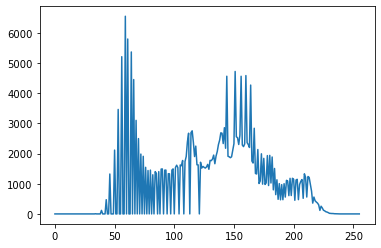

In [23]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("./Data/lenna.png", cv2.IMREAD_GRAYSCALE) ##컬러로그리면 복잡하니 grayscale로
cv2.imshow("lenna", img)

# 히스토그램
# 이미지, 채널, 필터(=마스크)(none==사용안하겠다), 색상수, x축의 범위
hist = cv2.calcHist([img], [0], None, [256], [0, 255])    ## 흑백0번채널만 있으므로 여기에선 0 (컬러면 3)

plt.plot(hist)

cv2.waitKey(0)
cv2.destroyAllWindows()

### 히스토그램 평활화 : 한쪽으로 치우친 값을 정규분포로 만들어줌 -> (이미지가) 선명해짐

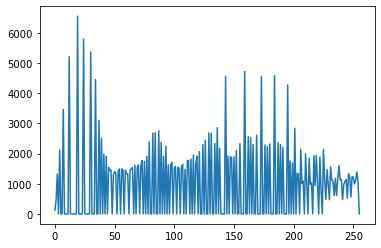

In [24]:
img2 = cv2.equalizeHist(img)
cv2.imshow("original", img)
cv2.imshow("equalize", img2)

hist2 = cv2.calcHist([img2], [0], None, [256], [0, 255])
plt.plot(hist2)

cv2.waitKey(0)
cv2.destroyAllWindows()

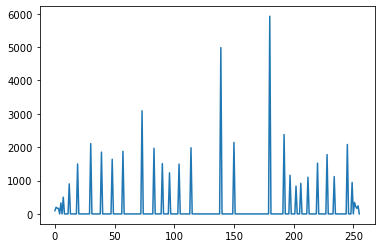

In [25]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("./Data/lenna1.jpg", cv2.IMREAD_GRAYSCALE) ##컬러로그리면 복잡하니 grayscale로

img2 = cv2.equalizeHist(img)
cv2.imshow("original", img)
cv2.imshow("equalize", img2)

hist2 = cv2.calcHist([img2], [0], None, [256], [0, 255])
plt.plot(hist2)

cv2.waitKey(0)
cv2.destroyAllWindows()

### 탬플릿 매칭 : 이미지 내에 이미지 조각 (탬플릿)이 있는지 검색하는 작업

사과 찾기

In [26]:
import cv2
import numpy as np

img = cv2.imread("./Data/game.png")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img2 = cv2.imread("./Data/game_cut.png", cv2.IMREAD_GRAYSCALE)

# 탬플릿 매칭
# 큰 이미지, 이미지 조각(탬플릿), 매칭방법(알고리즘종류임)
# res : 매칭률 (0.0 -1.0 사이의 값 반환)
res = cv2.matchTemplate(img_gray, img2, cv2.TM_CCOEFF_NORMED)

# 탬플릿 크기를 가져온다 [width,height,color] ((w는 26,h는 23))(사과의 크기)
w, h = img2.shape[::-1]

# 매칭된 위치 값을 가져온다 (70%)
loc = np.where(res >= 0.7)  ##(매칭률 70%이상인 값 가져와서  위치값 반환하자는 것)

for pt in zip(*loc[::-1]):
              #이미지, 시작위치, 끝위치,       색상,       두께
    cv2.rectangle(img, pt, (pt[0]+w, pt[1]+h), (0, 0, 255), 2)
    
cv2.imshow("match", img)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [27]:
img2.shape

(26, 23)

사다리 찾기

In [28]:
import cv2
import numpy as np

img = cv2.imread("./Data/game.png")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img2 = cv2.imread("./Data/game_ladder.png", cv2.IMREAD_GRAYSCALE)

# 탬플릿 매칭
# 큰 이미지, 이미지 조각(탬플릿), 매칭방법(알고리즘종류임)
# res : 매칭률 (0.0 -1.0 사이의 값 반환)
res = cv2.matchTemplate(img_gray, img2, cv2.TM_CCOEFF_NORMED)

# 탬플릿 크기를 가져온다 [width,height,color] ((w는 26,h는 23))(사과의 크기)
w, h = img2.shape[::-1]

# 매칭된 위치 값을 가져온다 (70%)
loc = np.where(res >= 0.7)  ##(매칭률 70%이상인 값 가져와서  위치값 반환하자는 것)

for pt in zip(*loc[::-1]):
              #이미지, 시작위치, 끝위치,       색상,       두께
    cv2.rectangle(img, pt, (pt[0]+w, pt[1]+h), (0, 0, 255), 2)
    
cv2.imshow("match", img)

cv2.waitKey(0)
cv2.destroyAllWindows()

꿀단지 찾기

In [29]:
import cv2
import numpy as np

img = cv2.imread("./Data/game.png")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img2 = cv2.imread("./Data/game_q.png", cv2.IMREAD_GRAYSCALE)

# 탬플릿 매칭
# 큰 이미지, 이미지 조각(탬플릿), 매칭방법(알고리즘종류임)
# res : 매칭률 (0.0 -1.0 사이의 값 반환)
res = cv2.matchTemplate(img_gray, img2, cv2.TM_CCOEFF_NORMED)

# 탬플릿 크기를 가져온다 [width,height,color] ((w는 26,h는 23))(사과의 크기)
w, h = img2.shape[::-1]

# 매칭된 위치 값을 가져온다 (70%)
loc = np.where(res >= 0.7)  ##(매칭률 70%이상인 값 가져와서  위치값 반환하자는 것)

for pt in zip(*loc[::-1]):
              #이미지, 시작위치, 끝위치,       색상,       두께
    cv2.rectangle(img, pt, (pt[0]+w, pt[1]+h), (0, 0, 255), 2)
    
cv2.imshow("match", img)

cv2.waitKey(0)
cv2.destroyAllWindows()

#### zip 함수

In [30]:
a = [0, 1, 2, 3]
b = [5, 6, 7, 8]

c = zip(a, b) ##a, b를 묶어주는 zip함수 ===> 0과5, 1과6, 2와7, 3과8을 묶어줌

for pt in c : 
    print(pt)

(0, 5)
(1, 6)
(2, 7)
(3, 8)


In [31]:
a[::-1] #x좌표와 y좌표 reverse

[3, 2, 1, 0]

In [32]:
x = [0, 1, 2, 3]
y = [5, 6, 7, 8]

loc = (np.array(x), np.array(y))

for pt in zip(*loc[::-1]) :   ##zip으로 묶은후 -1로 좌표값 바꿔줌     ### *쓰면 변수를 여러개쓰는것과 같음
    print(pt)

(5, 0)
(6, 1)
(7, 2)
(8, 3)


### 이미지 내에서 원을 찾기 (허프 변환)

In [33]:
import numpy as np

img = cv2.imread("./Data/signal_light.jpg")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 허프 변환을 이용한 원을 찾기
circle = cv2.HoughCircles(img_gray,             # 이미지
                          cv2.HOUGH_GRADIENT,   # 알고리즘
                          1,                    # canny의 값범위
                          10,                   # 원들 사이의 거리값
                          param1=60,            # canny연산자값
                          param2=50,            # 허브변환지수
                          minRadius=10,         # 최소 원의 반지름
                          maxRadius=100)        # 최대 원의 반지름

# 원을 검색했다면
if circle is not None:
    circles = np.uint16(np.around(circle)) ##반올림한 값 정수형으로 변환
    
    # 검색된 원을 그린다
    # circles : 중심 X좌표, 중심 y좌표, 반지름
    for i in circles[0, :]:
        cv2.circle(img, (i[0], i[1]), i[2], (255, 0, 0), 2)
        
cv2.imshow("circle", img)
        
cv2.waitKey(0)
cv2.destroyAllWindows()

### 코너점 찾기
    - 이미지 매칭시 코너의 중요성!

In [34]:
import cv2
import numpy as np

img = cv2.imread("./Data/corner.png")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


corner = cv2.goodFeaturesToTrack(img_gray,   # 이미지
                                 25,         # 코너점 개수
                                 0.01,       # 임계값
                                 10)         # 코너점간의 최소거리
corner = np.int0(corner) #  값을 정수로 변환   ## int쓰는것과 같음

# 코너점들 출력
for i in corner:
    x, y = i.ravel()  #다차원 배열 -> 1차원 배열 (=flatten)->배열만 사용. ravel은 배열이외에도 사용 가능
    # -1 : 내부를 채움
    cv2.circle(img, (x,y), 3, (255, 0, 0), -1)

cv2.imshow("corner", img)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [35]:
import cv2
import numpy as np

img = cv2.imread("./Data/circle.png")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


corner = cv2.goodFeaturesToTrack(img_gray,   # 이미지
                                 16,         # 코너점 개수
                                 0.01,       # 임계값
                                 10)         # 코너점간의 최소거리
corner = np.int0(corner) #  값을 정수로 변환   ## int쓰는것과 같음

# 코너점들 출력
for i in corner:
    x, y = i.ravel()  #다차원 배열 -> 1차원 배열 (=flatten)->배열만 사용. ravel은 배열이외에도 사용 가능
    # -1 : 내부를 채움
    cv2.circle(img, (x,y), 3, (255, 0, 0), -1)

cv2.imshow("circle", img)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [36]:
import cv2
import numpy as np

img = cv2.imread("./Data/sun.png")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


corner = cv2.goodFeaturesToTrack(img_gray,   # 이미지
                                 46,         # 코너점 개수
                                 0.01,       # 임계값
                                 10)         # 코너점간의 최소거리
corner = np.int0(corner) #  값을 정수로 변환   ## int쓰는것과 같음

# 코너점들 출력
for i in corner:
    x, y = i.ravel()  #다차원 배열 -> 1차원 배열 (=flatten)->배열만 사용. ravel은 배열이외에도 사용 가능
    # -1 : 내부를 채움
    cv2.circle(img, (x,y), 3, (255, 0, 0), -1)

cv2.imshow("sun", img)

cv2.waitKey(0)
cv2.destroyAllWindows()

### ORB 알고리즘을 이용한 특징점 찾기
    - 이미지에 축소, 회전 등 일어나도 특징점을 찾아내는 ORB 알고리즘
    - 이 앞의 알고리즘들은 못 찾아냄

코너점 찾기

In [37]:
import cv2
import numpy as np

img = cv2.imread("./Data/butterfly.png")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


corner = cv2.goodFeaturesToTrack(img_gray,   # 이미지
                                 72,         # 코너점 개수
                                 0.01,       # 임계값
                                 10)         # 코너점간의 최소거리
corner = np.int0(corner) #  값을 정수로 변환   ## int쓰는것과 같음

# 코너점들 출력
for i in corner:
    x, y = i.ravel()  #다차원 배열 -> 1차원 배열 (=flatten)->배열만 사용. ravel은 배열이외에도 사용 가능
    # -1 : 내부를 채움
    cv2.circle(img, (x,y), 3, (255, 0, 0), -1)

cv2.imshow("butterfly", img)

cv2.waitKey(0)
cv2.destroyAllWindows()

ORB 알고리즘

In [38]:
import cv2
import numpy as np

img = cv2.imread("./Data/butterfly.png")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 특징점 찾기
orb = cv2.ORB_create()
# kp : 특징점 위치, des : 특징점기술자(특징찾았는데 어떻게 찾았다하는 옵션넘겨주는 것)
kp, des = orb.detectAndCompute(img, None)

img2 = img.copy()

for marker in kp:
    img2 = cv2.drawMarker(img2, tuple(int(i) for i in marker.pt),  ## marker값 하나하나 읽어서 정수형으로변환후 튜플로 저장
                         markerType=3, markerSize=10, thickness=1,
                         color=(0,0,255))


cv2.imshow("orb",img2)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [39]:
import cv2
import numpy as np

img = cv2.imread("./Data/pony.jpg")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 특징점 찾기
orb = cv2.ORB_create()
# kp : 특징점 위치, des : 특징점기술자(특징찾았는데 어떻게 찾았다하는 옵션넘겨주는 것)
kp, des = orb.detectAndCompute(img, None)

img2 = img.copy()

for marker in kp:
    img2 = cv2.drawMarker(img2, tuple(int(i) for i in marker.pt),  ## marker값 하나하나 읽어서 정수형으로변환후 튜플로 저장
                         markerType=3, markerSize=10, thickness=1,
                         color=(255,0,0))


cv2.imshow("orb",img2)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [40]:
import cv2
import numpy as np

img = cv2.imread("./Data/maple.jpg")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 특징점 찾기
orb = cv2.ORB_create()
# kp : 특징점 위치(keyPoint), des : 특징점기술자(특징찾았는데 어떻게 찾았다하는 옵션넘겨주는 것)
kp, des = orb.detectAndCompute(img, None)

img2 = img.copy()

for marker in kp:
    img2 = cv2.drawMarker(img2, tuple(int(i) for i in marker.pt),  ## marker값 하나하나 읽어서 정수형으로변환후 튜플로 저장
                         markerType=3, markerSize=10, thickness=1,
                         color=(255,0,0))


cv2.imshow("orb",img2)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [41]:
import cv2
import numpy as np

img1 = cv2.imread("./Data/pic.png")
img2 = cv2.imread("./Data/girl_pic.png")
img_gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img_gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)


# 특징점 찾기
orb = cv2.ORB_create()
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)

# 두 개의 특징점들 간의 매칭을 계산한다
# crossCheck : 서로 매칭을 계산한다   ##양쪽에서 cross체크해서 서로 매칭되는지 확인한다는 것
bf = cv2 .BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1, des2)   ##--> 이러면 각 점들간 매칭점수가 나온다@

# 매칭도별로 정렬
matches = sorted(matches, key=lambda x:x.distance)

# flags : 1(매칭이 안 된 점도 표시), 2(매칭된 점만 표시)
res = cv2.drawMatches(img1, kp1, img2, kp2, matches[:12], res, flags=2)


cv2.imshow("orb",res)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [42]:
import cv2
import numpy as np

img1 = cv2.imread("./Data/pony1.png")
img2 = cv2.imread("./Data/pony2.jpg")
img_gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img_gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)


# 특징점 찾기
orb = cv2.ORB_create()
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)

# 두 개의 특징점들 간의 매칭을 계산한다
# crossCheck : 서로 매칭을 계산한다   ##양쪽에서 cross체크해서 서로 매칭되는지 확인한다는 것
bf = cv2 .BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1, des2)   ##--> 이러면 각 점들간 매칭점수가 나온다@

# 매칭도별로 정렬
matches = sorted(matches, key=lambda x:x.distance)

# flags : 1(매칭이 안 된 점도 표시), 2(매칭된 점만 표시)
res = cv2.drawMatches(img1, kp1, img2, kp2, matches[:12], res, flags=2)


cv2.imshow("orb",res)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [43]:
import cv2
import numpy as np

img1 = cv2.imread("./Data/hh1.jpg")
img2 = cv2.imread("./Data/hh2.jpg")
img_gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img_gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)


# 특징점 찾기
orb = cv2.ORB_create()
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)

# 두 개의 특징점들 간의 매칭을 계산한다
# crossCheck : 서로 매칭을 계산한다   ##양쪽에서 cross체크해서 서로 매칭되는지 확인한다는 것
bf = cv2 .BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1, des2)   ##--> 이러면 각 점들간 매칭점수가 나온다@

# 매칭도별로 정렬
matches = sorted(matches, key=lambda x:x.distance)

# flags : 1(매칭이 안 된 점도 표시), 2(매칭된 점만 표시)
res = cv2.drawMatches(img1, kp1, img2, kp2, matches[:12], res, flags=2)


cv2.imshow("orb",res)

cv2.waitKey(0)
cv2.destroyAllWindows()

### 얼굴과 눈을 검색

#### 얼굴검색

In [44]:
import cv2

#눈썹 기준으로 검색
face_cascade = cv2.CascadeClassifier("./Data/haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier("./Data/haarcascade_eye.xml")

img = cv2.imread("./Data/face.png")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 얼굴 검색 (이미지, 스케일, 최소이웃값)
# 얼굴의 R이 좌표를 반환
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

for (x, y, w, h) in faces:
    cv2.rectangle(img, (x,y), (x+w, y+h), (255, 0, 0), 2)
    
cv2.imshow("face", img)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [46]:
import cv2

#눈썹 기준으로 검색
face_cascade = cv2.CascadeClassifier("./Data/haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier("./Data/haarcascade_eye.xml")

img = cv2.imread("./Data/hh1.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 얼굴 검색 (이미지, 스케일, 최소이웃값)
# 얼굴의 R이 좌표를 반환
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

for (x, y, w, h) in faces:
    cv2.rectangle(img, (x,y), (x+w, y+h), (255, 0, 0), 2)
    
cv2.imshow("hh1", img)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [48]:
import cv2

#눈썹 기준으로 검색
face_cascade = cv2.CascadeClassifier("./Data/haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier("./Data/haarcascade_eye.xml")

img = cv2.imread("./Data/pony2.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 얼굴 검색 (이미지, 스케일, 최소이웃값)
# 얼굴의 R이 좌표를 반환
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

for (x, y, w, h) in faces:
    cv2.rectangle(img, (x,y), (x+w, y+h), (255, 0, 0), 2)
    
cv2.imshow("pony2", img)

cv2.waitKey(0)
cv2.destroyAllWindows()

#### 눈 검색

In [58]:
import cv2

#눈썹 기준으로 검색
face_cascade = cv2.CascadeClassifier("./Data/haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier("./Data/haarcascade_eye.xml")

img = cv2.imread("./Data/face.png")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 얼굴 검색 (이미지, 스케일, 최소이웃값)
# 얼굴의 R이 좌표를 반환
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

for (x, y, w, h) in faces:
    cv2.rectangle(img, (x,y), (x+w, y+h), (255, 0, 0), 2)
    
    # 얼굴 영역만 분리! 
    roi_eye = gray[y:y+h, x:x+w]
    roi_eye_color = img[y:y+h, x:x+w]
    
    # 눈 영역을 검색!!
    eyes = eye_cascade.detectMultiScale(roi_eye, 1.2, 2)
    
    for(ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_eye_color, (ex,ey), (ex+ew, ey+eh), (0, 0, 255), 2)
    
    
cv2.imshow("face", img)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [2]:
import cv2

#눈썹 기준으로 검색
face_cascade = cv2.CascadeClassifier("./Data/haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier("./Data/haarcascade_eye.xml")

img = cv2.imread("./Data/model.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 얼굴 검색 (이미지, 스케일, 최소이웃값)
# 얼굴의 R이 좌표를 반환
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

for (x, y, w, h) in faces:
    cv2.rectangle(img, (x,y), (x+w, y+h), (255, 0, 0), 2)
    
    # 얼굴 영역만 분리! 
    roi_eye = gray[y:y+h, x:x+w]
    roi_eye_color = img[y:y+h, x:x+w]
    
    # 눈 영역을 검색!!
    eyes = eye_cascade.detectMultiScale(roi_eye)
    
    for(ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_eye_color, (ex,ey), (ex+ew, ey+eh), (0, 0, 255), 2)
    
    
cv2.imshow("model", img)

cv2.waitKey(0)
cv2.destroyAllWindows()

### 영상에서 얼굴을 찾기

In [4]:
import cv2

#눈썹 기준으로 검색
face_cascade = cv2.CascadeClassifier("./Data/haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier("./Data/haarcascade_eye.xml")

try:
    print("영상 캡쳐 성공")
    cap = cv2.VideoCapture("./Data/video1.mp4")
    #cap = cv2.VideoCapture(0)
except:
    print("영상 캡쳐 실패")
    
while True:
    ret, frame = cap.read()
    
    if not ret : 
        print("비디오 읽기 실패")
    
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # 얼굴 검색 (이미지, 스케일, 최소이웃값)
    # 얼굴의 R이 좌표를 반환
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x,y), (x+w, y+h), (255, 0, 0), 2)

        # 얼굴 영역만 분리! 
        roi_eye = gray[y:y+h, x:x+w]
        roi_eye_color = frame[y:y+h, x:x+w]

        # 눈 영역을 검색!!
        eyes = eye_cascade.detectMultiScale(roi_eye)

        for(ex, ey, ew, eh) in eyes:
            cv2.rectangle(roi_eye_color, (ex,ey), (ex+ew, ey+eh), (0, 0, 255), 2)


    cv2.imshow("vidoe1", frame)

    key = cv2.waitKey(33)
    
    if key == 49:
        cap.release()
        cv2.destroyAllWindows()
        break

영상 캡쳐 성공
